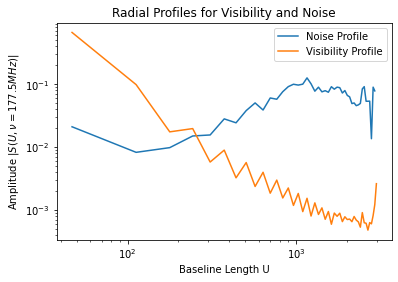

In [6]:
# %load diagnostic_plots.py
from cProfile import label
import numpy as np
import matplotlib.pyplot as plt
import sys

#Prepping Noise Data
noise_data = np.load("/home/haricash/Sem 7/Project/code-scripts/bubbles/datafiles/noise_data.npy")
center = [int(len(noise_data)/2), int(len(noise_data)/2)]

noise_data = np.fft.fft2(noise_data)
noise_data = np.fft.fftshift(noise_data)

#Prepping visibility data for a spherical source
vis_data = np.load("/home/haricash/Sem 7/Project/code-scripts/bubbles/datafiles/spherical_bubble.npy")[:,:,32]
vis_data = vis_data/25000
vis_data = np.fft.fft2(vis_data)
vis_data = np.fft.fftshift(vis_data)

# Radial profile
def radial_profile(data, center):
    y, x = np.indices((data.shape))
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    r = r.astype(np.int32)
    data = np.abs(data)

    tbin = np.bincount(r.ravel(), data.ravel())
    nr = np.bincount(r.ravel())
    radialprofile = tbin / nr
    return np.abs(radialprofile)

noise_rad = radial_profile(np.abs(noise_data), center)
vis_rad = radial_profile(np.abs(vis_data), center)

baseline = np.linspace(46.786, 2995.837, len(noise_rad))

plt.plot(baseline[:-1], noise_rad[:-1] * 10**26, label="Noise Profile")
plt.plot(baseline, vis_rad, label="Visibility Profile")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r"Baseline Length U")
plt.ylabel(r"Amplitude $|S(U,\nu = 177.5 MHz)|$")
plt.legend()
plt.title("Radial Profiles for Visibility and Noise")
plt.savefig("diagnostic_plots.png", bbox_inches="tight")

# def datau(slice):
#     for i in range(64):
#         for j in range(64):
#             for k in range(64):
                
#                 data.append(((i-center)**2 + (j-center)**2 + (k-center)**2), slice[i]**2 + slice[j]**2 + slice[k]**2)

# This doesn't feel like the right way. I will try to define functions for
# each aspect of the subplot seperately

# def norm(cube):
#     center = len(cube)/2
#     len = center*2

#     for i in range(len) :
#         for j in range(len):
#             for k in range(len):
#                 if np.sqrt((i-center)**2 + (j-center)**2 + (k-center)**2)

# def diagnostic(mod_u, del_nu, data, noise):
    
#     fig, ax = plt.subplots(1,2)

#     ax[0] = plt.plot(mod_u, data_cube)
    
#     ax[0].set_xlabel("|U|")
#     ax[0].set_ylabel("|S(U, $\delta \nu = 0$)|")

#     ax[1] = plt.plot(del_nu, data)

#     fig.suptitle("Diagnostic tests for data")

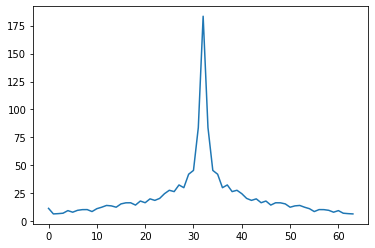

In [13]:
# %load diagnostic_plots_freq.py
import numpy as np
import matplotlib.pyplot as plt

#Prepping visibility data for a spherical source
vis_data = np.load("/home/haricash/Sem 7/Project/code-scripts/bubbles/datafiles/spherical_bubble.npy")

vis_data = np.fft.fft2(vis_data)
vis_data = np.fft.fftshift(vis_data)

# Radial profile
def radial_profile(data, center):
    y, x = np.indices((data.shape))
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    r = r.astype(np.int32)
    data = np.abs(data)

    tbin = np.bincount(r.ravel(), data.ravel())
    nr = np.bincount(r.ravel())
    radialprofile = tbin / nr
    return np.abs(radialprofile)

def freq_profile(radius, data):
    
    length = len(data[radius,radius,:])
    profile = np.zeros(length)
    
    for i in range(length):
        profile[i] = radial_profile(data[:, :, i], [32,32])[radius]

    return profile


plt.plot(np.abs(freq_profile(32, vis_data)))
plt.show()

In [ ]:
%load mcm